# Análisis de datos
Pandas, https://pandas.pydata.org/

Sklearn, https://scikit-learn.org/stable/

Plotly, https://plotly.com/python/

In [42]:
# Librerias
import pandas as pd
import seaborn as sns
import plotly.express as px

## Lectura de datos con PANDAS

Obtenemos los datos de https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr

In [43]:
# Leer base de datos
df = pd.read_csv('https://www.datos.gov.co/resource/gt2j-8ykr.csv')

## Visualización de los datos con PANDAS

In [44]:
# Mostrar las 3 primeras filas
df.head(3)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN
2,2021-03-04 00:00:00,2265687,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,NaN,NaN,Recuperado,2021-02-24 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN


In [45]:
# Miramos cuales son las columans de nuestra base de datos
df.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [46]:
# Observamos cuales son las columnas e información de nuestos datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_reporte_web      1000 non-null   object 
 1   id_de_caso             1000 non-null   int64  
 2   fecha_de_notificaci_n  1000 non-null   object 
 3   departamento           1000 non-null   int64  
 4   departamento_nom       1000 non-null   object 
 5   ciudad_municipio       1000 non-null   int64  
 6   ciudad_municipio_nom   1000 non-null   object 
 7   edad                   1000 non-null   int64  
 8   unidad_medida          1000 non-null   int64  
 9   sexo                   1000 non-null   object 
 10  fuente_tipo_contagio   1000 non-null   object 
 11  ubicacion              992 non-null    object 
 12  estado                 992 non-null    object 
 13  pais_viajo_1_cod       0 non-null      float64
 14  pais_viajo_1_nom       0 non-null      float64
 15  recup

In [47]:
# Observamos si existen valores nulos en los dataframe
df.isnull().any()

fecha_reporte_web        False
id_de_caso               False
fecha_de_notificaci_n    False
departamento             False
departamento_nom         False
ciudad_municipio         False
ciudad_municipio_nom     False
edad                     False
unidad_medida            False
sexo                     False
fuente_tipo_contagio     False
ubicacion                 True
estado                    True
pais_viajo_1_cod          True
pais_viajo_1_nom          True
recuperado                True
fecha_inicio_sintomas    False
fecha_muerte              True
fecha_diagnostico        False
fecha_recuperado          True
tipo_recuperacion         True
per_etn_                 False
nom_grupo_                True
dtype: bool

## Limpieza de datos con PANDAS

In [48]:
# Eliminación de columnas, es necesario axis=1 para hacer referencia a columna, axis=0 son filas (index)
df = df.drop(['pais_viajo_1_cod', 'pais_viajo_1_nom', 'fecha_muerte', 'nom_grupo_'], axis=1);

In [49]:
# Volvemos a ver nuestra información de datos para ver los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha_reporte_web      1000 non-null   object
 1   id_de_caso             1000 non-null   int64 
 2   fecha_de_notificaci_n  1000 non-null   object
 3   departamento           1000 non-null   int64 
 4   departamento_nom       1000 non-null   object
 5   ciudad_municipio       1000 non-null   int64 
 6   ciudad_municipio_nom   1000 non-null   object
 7   edad                   1000 non-null   int64 
 8   unidad_medida          1000 non-null   int64 
 9   sexo                   1000 non-null   object
 10  fuente_tipo_contagio   1000 non-null   object
 11  ubicacion              992 non-null    object
 12  estado                 992 non-null    object
 13  recuperado             993 non-null    object
 14  fecha_inicio_sintomas  1000 non-null   object
 15  fecha_diagnostico     

In [50]:
df = df.astype({
    'fecha_reporte_web': 'datetime64[ns]',
    'fecha_de_notificaci_n': 'datetime64[ns]',
    'departamento_nom': 'string',
    'ciudad_municipio_nom': 'string',
    'sexo': 'string',
    'fuente_tipo_contagio': 'string',
    'ubicacion': 'string',
    'recuperado': 'string',
    'fecha_inicio_sintomas': 'datetime64[ns]',
    'fecha_diagnostico': 'datetime64[ns]',
    'fecha_recuperado': 'datetime64[ns]',
    'tipo_recuperacion': 'string',
});

In [51]:
# Volvemos a ver nuestra información de datos para ver los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_reporte_web      1000 non-null   datetime64[ns]
 1   id_de_caso             1000 non-null   int64         
 2   fecha_de_notificaci_n  1000 non-null   datetime64[ns]
 3   departamento           1000 non-null   int64         
 4   departamento_nom       1000 non-null   string        
 5   ciudad_municipio       1000 non-null   int64         
 6   ciudad_municipio_nom   1000 non-null   string        
 7   edad                   1000 non-null   int64         
 8   unidad_medida          1000 non-null   int64         
 9   sexo                   1000 non-null   string        
 10  fuente_tipo_contagio   1000 non-null   string        
 11  ubicacion              992 non-null    string        
 12  estado                 992 non-null    object        
 13  recu

In [52]:
# Mostrar las 3 primeras filas
df.head(3)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_
0,2021-03-04,2265685,2021-03-02,11,BOGOTA,11001,BOGOTA,49,1,M,Comunitaria,Casa,Leve,Recuperado,2021-02-25,2021-03-03,2021-03-16,Tiempo,6
1,2021-03-04,2265686,2021-03-02,11,BOGOTA,11001,BOGOTA,49,1,M,Relacionado,Casa,Leve,Recuperado,2021-02-23,2021-03-03,2021-03-16,Tiempo,6
2,2021-03-04,2265687,2021-03-02,11,BOGOTA,11001,BOGOTA,51,1,F,Comunitaria,Casa,Leve,Recuperado,2021-02-24,2021-03-03,2021-03-16,Tiempo,6


## Más visualización de datos

In [53]:
# Mostramos cuáles son los departamentos que hay en el dataframe
df['departamento_nom'].unique()

<StringArray>
[         'BOGOTA',          'NARIÑO',       'SANTANDER',       'RISARALDA',
          'BOYACA', 'NORTE SANTANDER',       'ANTIOQUIA',         'CAQUETA',
            'META',           'VALLE',           'CESAR',    'BARRANQUILLA',
           'HUILA',         'VICHADA',        'PUTUMAYO',           'CAUCA',
       'MAGDALENA',         'CORDOBA',       'ATLANTICO',    'CUNDINAMARCA',
          'CALDAS',           'SUCRE',  'STA MARTA D.E.',          'TOLIMA',
       'CARTAGENA',         'QUINDIO',         'GUAJIRA',         'BOLIVAR',
        'AMAZONAS',        'CASANARE',          'ARAUCA',           'CHOCO']
Length: 32, dtype: string

In [54]:
# Cambiamos el nombre del departamento de "NARIÑO" a "NARINO"
df.loc[df['departamento_nom'] == 'NARIÑO', 'departamento_nom'] = 'NARINO'

In [55]:
# Volvemos a ver nuestros departamentos
df['departamento_nom'].unique()

<StringArray>
[         'BOGOTA',          'NARINO',       'SANTANDER',       'RISARALDA',
          'BOYACA', 'NORTE SANTANDER',       'ANTIOQUIA',         'CAQUETA',
            'META',           'VALLE',           'CESAR',    'BARRANQUILLA',
           'HUILA',         'VICHADA',        'PUTUMAYO',           'CAUCA',
       'MAGDALENA',         'CORDOBA',       'ATLANTICO',    'CUNDINAMARCA',
          'CALDAS',           'SUCRE',  'STA MARTA D.E.',          'TOLIMA',
       'CARTAGENA',         'QUINDIO',         'GUAJIRA',         'BOLIVAR',
        'AMAZONAS',        'CASANARE',          'ARAUCA',           'CHOCO']
Length: 32, dtype: string

## Gráfico con SKLEARN

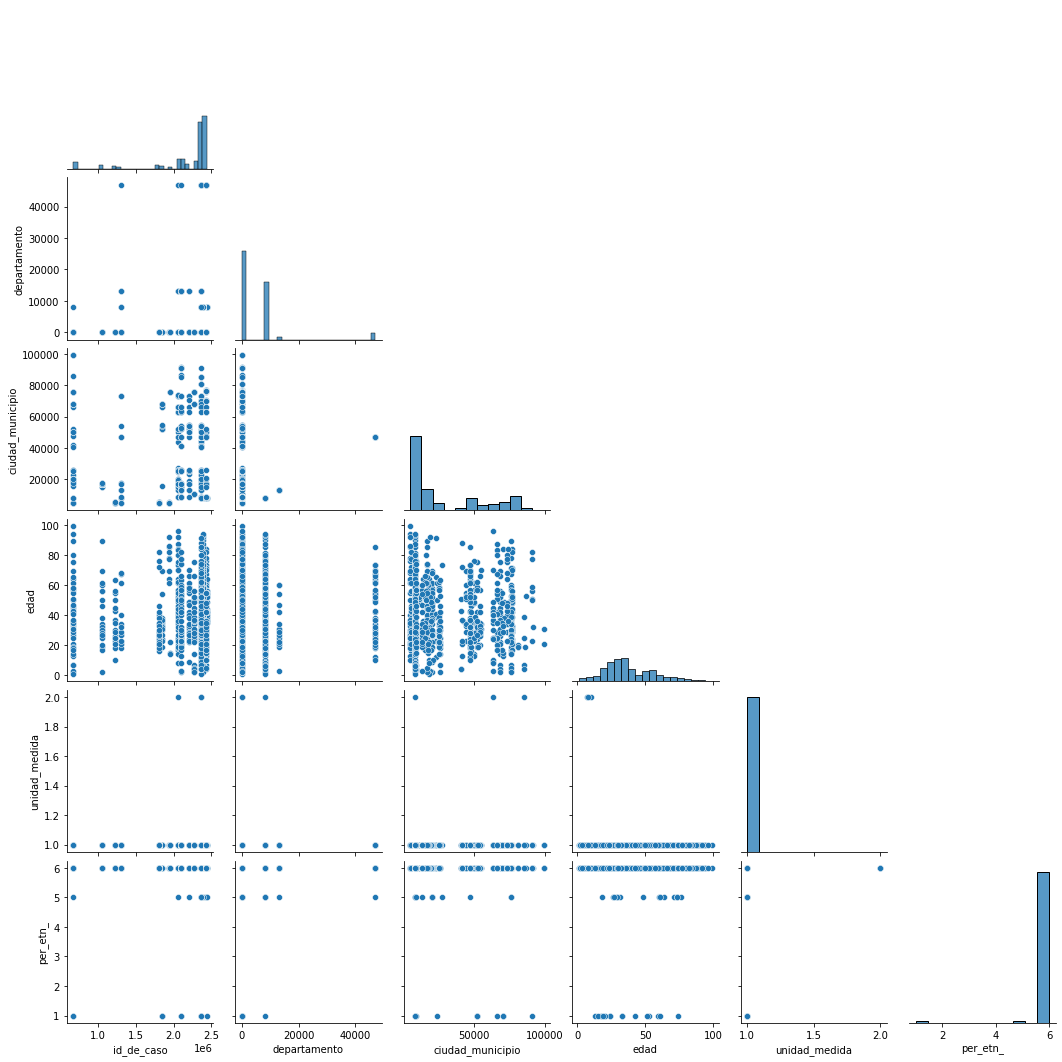

In [56]:
# Graficamos la coorelación cruzada entre los elemenos, para conocer cual es la relación entre los elementos
sns.pairplot(data=df, corner=True)

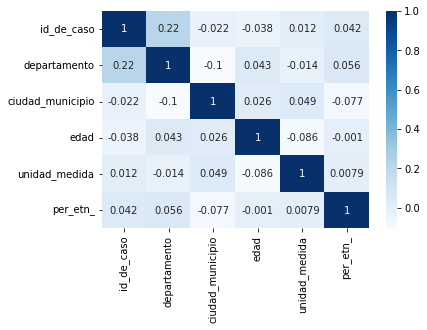

In [57]:
# De igual manera podemos ver la relación entre las columnas con un mapa de calor
sns.heatmap(df.corr(), annot=True, cmap='Blues')

## Análisis gráfico con PLOTLY

Gráfico de departamentos VS. # de reportes

In [58]:
data = df.groupby(['departamento_nom']).size()
fig = px.bar(data, text_auto='.2s')
fig.update_layout(showlegend=False)
fig.update_traces(textangle=0)
fig.show()

In [77]:
data = df.groupby(['departamento_nom']).size().reset_index(name='counts')
fig = px.pie(data, values='counts', names='departamento_nom', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [59]:
data = df.groupby(['fecha_inicio_sintomas']).size()
fig = px.line(data)
fig.update_layout(showlegend=False)
fig.show()